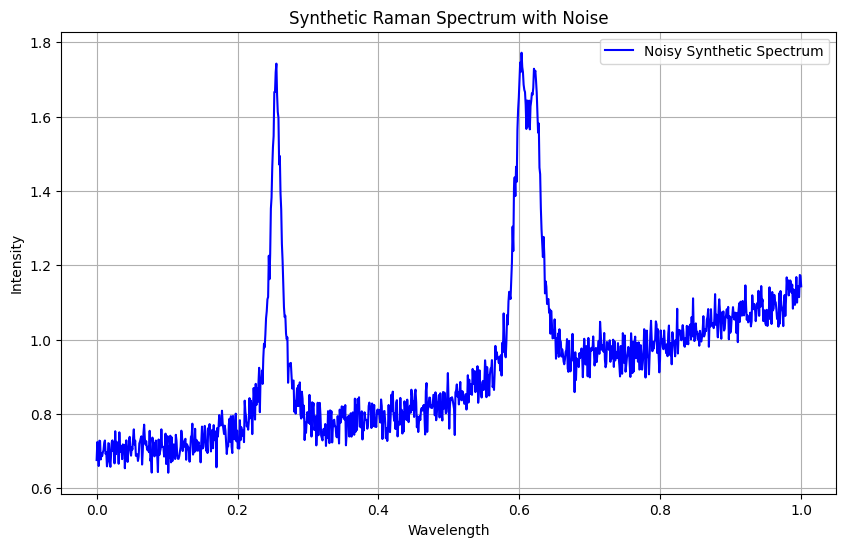

In [1]:
# 3. NOISE GENERATION
# Add Noise (specifications)
# Noise follows normal distribution (mean and standard deviation (M & SD)) 
# snr = signal-to-noise ratio, nar = noise amplitude range
import numpy as np
import matplotlib.pyplot as plt

class SpectraParameters:
    def __init__(self, pixels, poly_order_range, num_peaks_range, snr_range, cosmic_ray_prob, num_spectra, wavelengths, spectrum):
        self.pixels = pixels
        self.poly_order_range = poly_order_range
        self.num_peaks_range = num_peaks_range
        self.snr_range = snr_range
        self.cosmic_ray_prob = cosmic_ray_prob
        self.num_spectra = num_spectra
        self.wavelengths = np.linspace(0, 1, self.pixels)
               
# Define parameter ranges
pixels = 1024
poly_order_range = (3, 10)
num_peaks_range = (2, 5)
snr_range = (10, 100)
cosmic_ray_prob = 0.1
num_spectra = 50

# Generate synthetic wavelengths & spectrum
wavelengths = np.linspace(0, 1, pixels)
spectrum = np.zeros(pixels)

class SyntheticRamanSpectrum:
    def __init__(self, pixels, poly_order_range, num_peaks_range, snr_range, cosmic_ray_prob, num_spectra):
        self.pixels = pixels
        self.poly_order_range = poly_order_range
        self.num_peaks_range = num_peaks_range
        self.snr_range = snr_range
        self.cosmic_ray_prob = cosmic_ray_prob
        self.num_spectra = num_spectra
        self.wavelengths = np.linspace(0, 1, self.pixels)
        self.spectrum = self.generate_spectrum()

    def generate_spectrum(self):
        # Generate baseline using a polynomial
        poly_order = np.random.randint(self.poly_order_range[0], self.poly_order_range[1] + 1)
        baseline_coefficients = np.random.rand(poly_order + 1)
        baseline = np.polyval(baseline_coefficients, self.wavelengths)
        
        # Generate Lorentzian peaks
        peaks = np.zeros_like(self.wavelengths)
        num_peaks = np.random.randint(self.num_peaks_range[0], self.num_peaks_range[1] + 1)
        for _ in range(num_peaks):
            peak_amplitude = np.random.uniform(0, 1)
            peak_position = np.random.uniform(0.2, 0.8)
            peak_width = 1 / (self.pixels * 0.1)
            peaks += peak_amplitude * (peak_width ** 2) / ((self.wavelengths - peak_position) ** 2 + peak_width ** 2)
        
        # Return generated spectrum
        return baseline + peaks

    def add_gaussian_noise(self, noise_amplitude_range=(0.1, 0.5)):
        # Calculate signal power
        signal_power = np.mean(np.abs(self.spectrum) ** 2)
    
        # Calculate noise power based on SNR
        noise_power = signal_power / self.snr_range
    
        # Calculate standard deviation of noise
        noise_std = np.sqrt(noise_power)
        
        # Generate random noise amplitudes within specified range
        min_amp, max_amp = noise_amplitude_range
        noise_amplitudes = np.random.uniform(min_amp, max_amp)
    
        # Generate Gaussian noise samples
        noise = np.random.normal(0, noise_std, len(self.wavelengths))
    
        # Scale noise by noise amplitudes
        noise *= noise_amplitudes
    
        # Add noise to signal
        noisy_spectrum = self.spectrum + noise
    
        return noisy_spectrum

# Create an instance of the SyntheticRamanSpectrum class
synthetic_spectrum = SyntheticRamanSpectrum(
    pixels=1024,
    poly_order_range=(2, 4),
    num_peaks_range=(2, 5),
    snr_range=10,  # Set your desired SNR here
    cosmic_ray_prob=0.1,
    num_spectra=1
)

# Add Gaussian noise to synthetic spectrum
noisy_spectrum = synthetic_spectrum.add_gaussian_noise()

# Plot noisy spectrum
plt.figure(figsize=(10, 6))
plt.plot(synthetic_spectrum.wavelengths, noisy_spectrum, color='blue', label='Noisy Synthetic Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Synthetic Raman Spectrum with Noise')
plt.legend()
plt.grid(True)
plt.show()